In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_cns = pd.read_csv('../../Data/Downloaded_Old/pre_cns.csv')
df_emp = pd.read_csv('../../Data/Downloaded_Old/pre_emp.csv')
df_cap = pd.read_csv('../../Data/Downloaded_Old/pre_cap.csv')
df_GDP = pd.read_csv('../../Data/Downloaded_Old/pre_GDP.csv')

In [3]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.66
α_LM  = 0.34
η     = 0.15
γ_pre = 50.85
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.05
β     = 0.96

In [4]:
# create the ratio of marginal utility
df_cns['cA-γ'] = df_cns['food_cns'] - γ_pre
df_cns['cA-γ/cM'] = (df_cns['food_cns'] - γ_pre) / df_cns['non_food_cns']
df_cns['mu_M/mu_A'] = (1-η) / η * df_cns['cA-γ/cM']

In [5]:
df_GDP_emp = pd.merge(df_GDP, df_emp, on = 'year_wst')

In [6]:
df_GDP_emp_picked = df_GDP_emp[['year_wst', 'prm_GDP', 'non_prm_GDP', 'prm_emp', 'non_prm_emp']].copy()

In [7]:
df_GDP_emp_picked['F_LA'] = α_LA * df_GDP_emp_picked['prm_GDP'] / df_GDP_emp_picked['prm_emp'] 

In [8]:
df_GDP_emp_picked['F_LM'] = α_LM * df_GDP_emp_picked['non_prm_GDP'] / df_GDP_emp_picked['non_prm_emp'] 

In [9]:
# get the ratio of labor productivity
df_GDP_emp_picked['F_LM/F_LA'] = df_GDP_emp_picked['F_LM'] / df_GDP_emp_picked['F_LA']

In [10]:
df_merged = pd.merge(df_GDP_emp_picked, 
                    df_cns[['year_wst', 'mu_M/mu_A']], on = 'year_wst')

In [11]:
df_merged['norm_labor_wedge'] = df_merged['mu_M/mu_A'] * df_merged['F_LM/F_LA']

In [12]:
df_merged['norm_labor_wedge-1'] = df_merged['norm_labor_wedge'] - 1

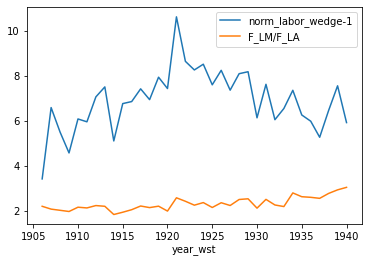

In [13]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'norm_labor_wedge-1', ax = ax)
df_merged.plot(x = 'year_wst', y ='F_LM/F_LA', ax = ax)
plt.legend()

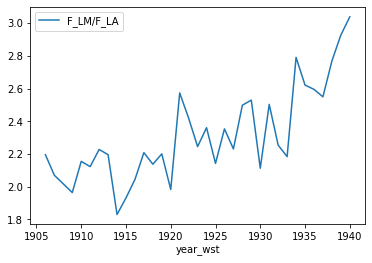

In [14]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y ='F_LM/F_LA', ax = ax)
plt.legend()

In [15]:
df_merged['YM/YA'] = df_merged['non_prm_GDP']/df_merged['prm_GDP']

In [16]:
df_merged['LM/LA'] = df_merged['non_prm_emp']/df_merged['prm_emp']

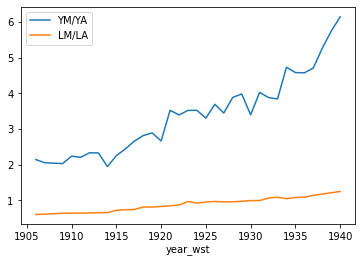

In [17]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'YM/YA', ax = ax)
df_merged.plot(x = 'year_wst', y = 'LM/LA', ax = ax)
plt.legend()

In [18]:
df_merged.to_csv('../../Data/Results/pre_lab_w_test.csv', index = False)